# **Welcome to the Making Corpus Demo Notebook**

In this demo notebook we go through the `corpus_maker.py` module and demonstrate its functionality.<br>


First  import some basic libraries and then install the requirements to set up the environment needed for the project.

In [2]:
# Basic libraries
import re
import os
import gc
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import time

import sys
sys.path.append("..")
from measure_time import measure_time

In [3]:
os.getcwd()

'D:\\Seafile\\Моя библиотека\\2 semester\\DEDA\\GitHub\\Bacha fork\\DEDA_class_SoSe2023\\DEDA_class_SoSe2023_LDA_Theses\\DEDA_class_SoSe2023_LDA_MSc_Theses\\LDA_MSc_3_Making_Corpus'

## Step 3) Making the corpus

For this we use the customly designed  `CorpusMaker` class, which includes three methods.

```python

CorpusMaker.make_corpus: 'Sets up the corpus, returns corpus, dictionary, ID mapping and texts. The returns are pickled and automatically saved to folder DICT_CORP.'
CorpusMaker.show_top_words: 'Prints selected amount of most frequent words per thesis.'
CorpusMaker.make_wordcloud: 'Generates word cloud image. The image is automatically saved to the Plots folder.'
CorpusMaker.make_UMAP: 'Generates UMAP graph of terms inside the corpus. The image is automatically saved to the Plots folder'


In [4]:
# Import the class
from corpus_maker import CorpusMaker

In [5]:
# Inspect the class
CorpusMaker?

Init signature: CorpusMaker(input_folder)
Docstring:     
A class used for turning the filtered LvB MSc theses into a corpus. Generally, this class can also be used to generate a corpus from any set of .txt files that have already gone through standard NLP preprocessing. 

Outputs are saved as pickle files in automatically generated folder DICT_CORP.

Args:
    input_folder (str): The folder containing the filtered MSc theses. (Should set to the output of the preprocessing function)
    
Attributes:
    dictionary: A dictionary generated using Gensim.
    dictionary_token2id: A mapping of tokens to IDs.
    corpus: BoW corpus generated from the theses. 
    texts: All tokens (used for coherence later on)
    dates: Returns dates list for theses
    
Methods:
    make_corpus: Processes the filtered theses texts, drops rare words overall, creates corpus.
    show_top_words: Prints the most frequent words per thesis in the corpus.
    make_wordcloud: Generates a wordcloud image from the c

In [6]:
corp_maker = CorpusMaker(input_folder = '../LDA_MSc_2_Preprocessing/Filtered Theses')

In [5]:
st = time.time()

dictionary, dictionary_token2id, corpus, texts, dates = corp_maker.make_corpus()

measure_time()


Creating corpus...

After removing 27770 rare words, total amount of words in the preprocessed texts decreased from 820804 to 793034

Corpus succesfully created.


In [6]:
corp_maker.show_top_words(amount = 5)


Thesis 1

estimate: 144

price: 126

bandwidth: 124

use: 107

option: 91


Thesis 2

portfolio: 155

return: 152

mean: 136

variance: 130

frontier: 126


Thesis 3

network: 165

function: 159

set: 81

neural: 75

neuron: 65


Thesis 4

learn: 111

md: 70

fic: 61

process: 54

booklet: 54


Thesis 5

course: 157

factor: 122

variable: 100

data: 87

student: 86


Thesis 6

md: 132

excel: 124

rex: 115

add: 96

statistical: 76


Thesis 7

function: 219

basis: 151

data: 132

spline: 129

use: 88


Thesis 8

function: 120

evalarg: 118

functional: 98

matrix: 86

coef: 86


Thesis 9

model: 250

option: 181

price: 156

hedge: 130

volatility: 125


Thesis 10

distribution: 130

density: 123

ic: 108

var: 96

estimate: 83


Thesis 11

tree: 175

data: 91

node: 91

decision: 64

class: 62


Thesis 12

model: 138

time: 94

iv: 93

one: 90

function: 80


Thesis 13

copula: 215

distribution: 91

portfolio: 47

function: 42

risk: 41


Thesis 14

copula: 259

parameter: 175

pa

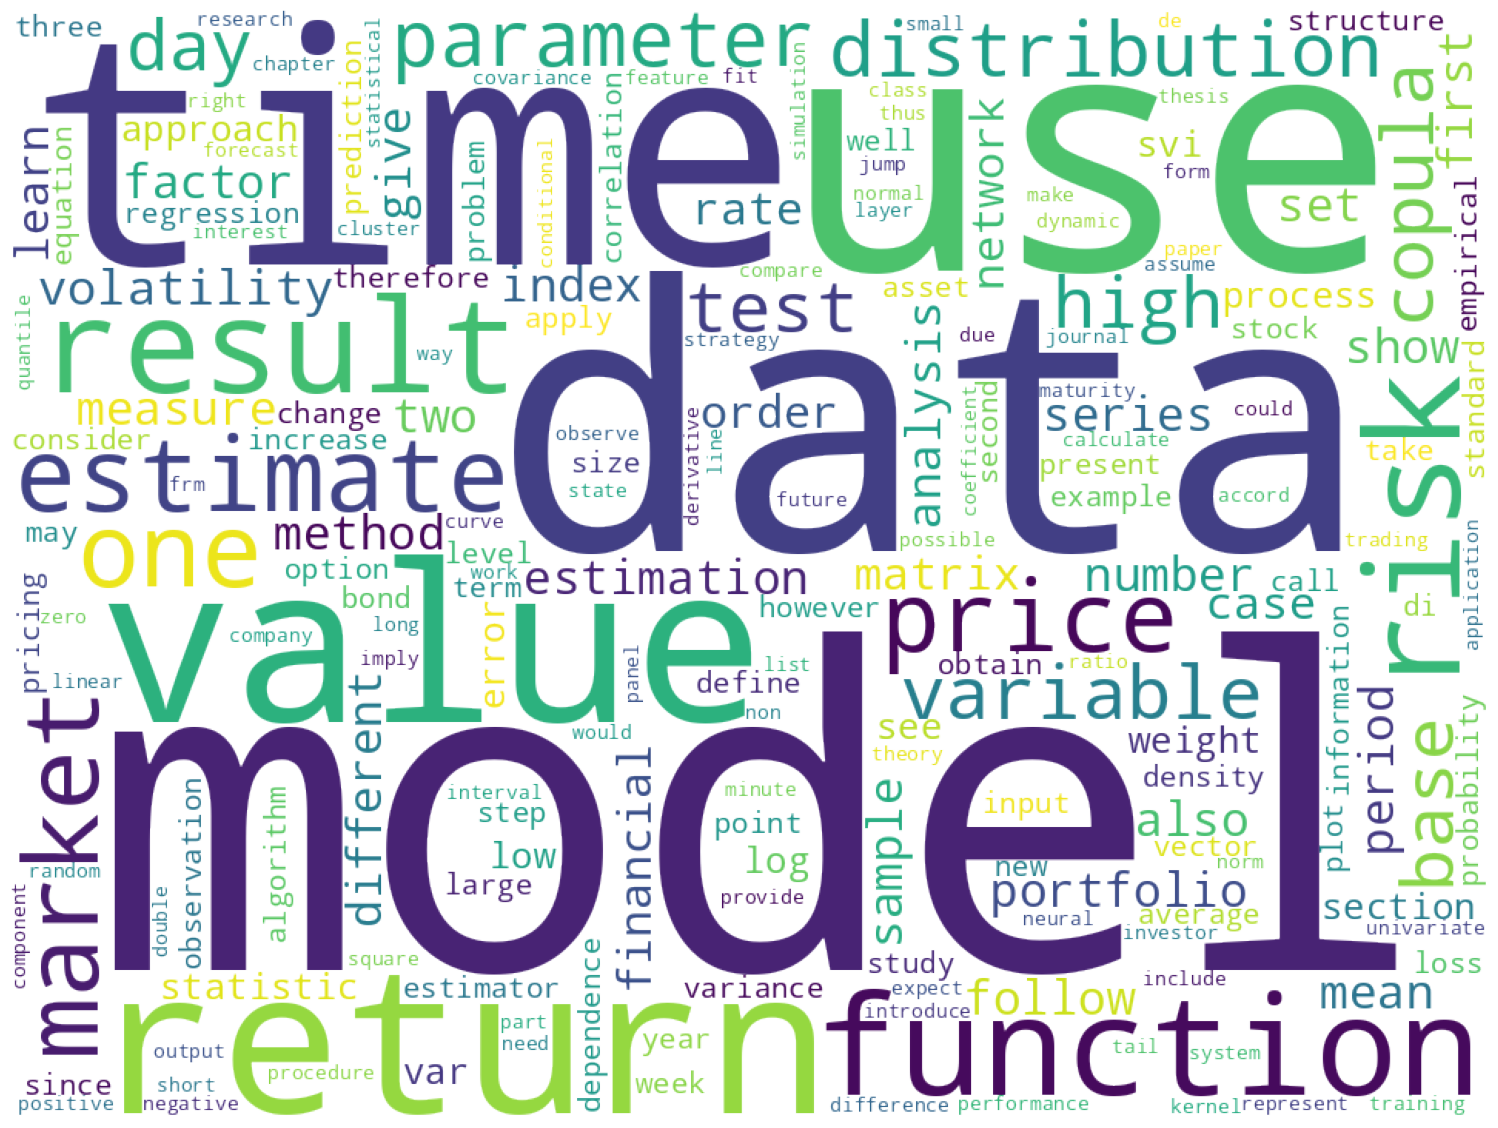

In [8]:
corp_maker.make_wordcloud()

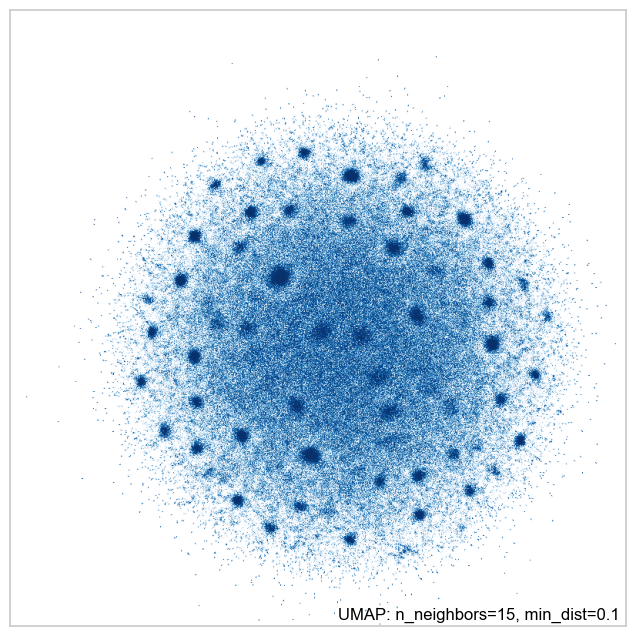

In [7]:
st = time.time()

corp_maker.make_UMAP()

measure_time()